<a href="https://colab.research.google.com/github/vitalns/scatterplot/blob/main/scatterplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-success">
<font size="5" color="blue">Диаграмма рассеяния </font>
<font size="7">🎆</font>
</div>
<p><b><i>Описание:</i></b>
Пример построения диаграммы рассеяния пары признаков из датасета penguins. На диаграмму добавлены маркеры средних значения и анотации к ним, настроена легенда. </p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Загрузим датасет penguins

penguins = sns.load_dataset("penguins")
penguins.dropna(inplace=True)
penguins.reset_index(drop=True, inplace=True)
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [4]:
# Создадим таблицу со средними значениями.

species = penguins.species.unique()
# # Раньше и так работало
# averages = [penguins[penguins['species'] == i].mean().to_list() for i in species]
averages = [penguins[penguins['species'] == i][penguins.select_dtypes(np.number).columns].mean().to_list() for i in species]
avg_data = pd.DataFrame(averages, columns=penguins.select_dtypes(np.number).columns)
avg_data['species'] = species
# avg_data['average'] = 'mean'
avg_data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
0,38.823973,18.347260,190.102740,3706.164384,Adelie
1,48.833824,18.420588,195.823529,3733.088235,Chinstrap
2,47.568067,14.996639,217.235294,5092.436975,Gentoo


In [5]:
# Добавим средние значения к общей таблице.

avg = avg_data.copy(deep=True)
avg.species = 'mean' # Добавляем заглушку для hue в pairgrid.
data_all = pd.concat([penguins, avg], ignore_index=True)
data_all.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
331,Gentoo,Biscoe,45.200000,14.800000,212.000000,5200.000000,Female
332,Gentoo,Biscoe,49.900000,16.100000,213.000000,5400.000000,Male
333,mean,NaN,38.823973,18.347260,190.102740,3706.164384,NaN
334,mean,NaN,48.833824,18.420588,195.823529,3733.088235,NaN
335,mean,NaN,47.568067,14.996639,217.235294,5092.436975,NaN


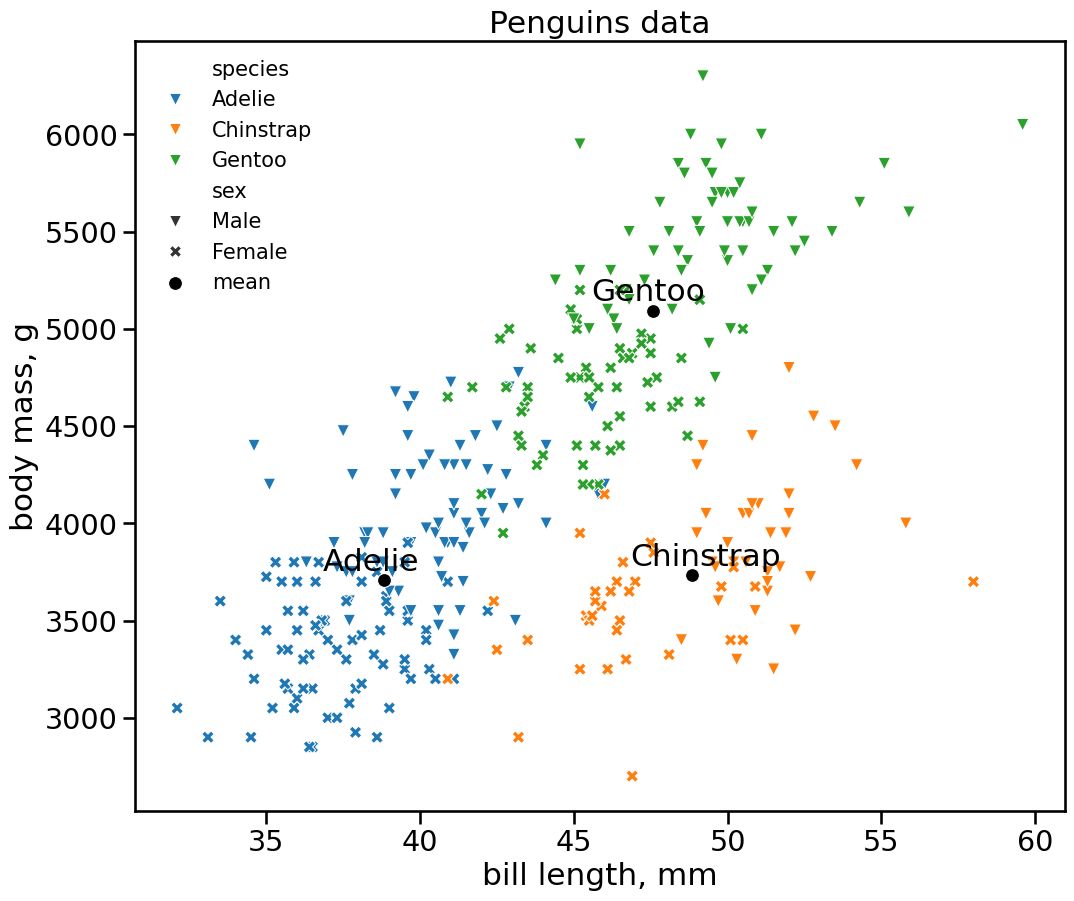

In [6]:
# Построим диаграмму рассеяния пары признаков (bill_length_mm, body_mass_g)

plt.figure(figsize=(12,10))
# Используем контекстный менеджер для локального изменения глобальных настроек (для данной диаграммы),
# в данном случае увеличили размер шрифта всех подписей и отдельно задали размер шрифта на легенде.
with sns.plotting_context("talk",font_scale=1.25, rc={'legend.fontsize': 15}):
    sns.scatterplot(x="bill_length_mm", y="body_mass_g",
                    data=penguins,
                    hue='species',
                    style='sex',
                    markers={'Female':'X', 'Male':'v'}
                    )
    sns.scatterplot(x="bill_length_mm", y="body_mass_g",
                    data=avg_data,
                    # style='mean',
                    s=100, marker='o',
                    color='black', #['steelblue','darkorange','g'],
                    label='mean'
                    )

    # Зададим подписи к средним значениям используя лямбда функцию.
    avg_data.apply(lambda x: plt.annotate(x.species, xy=(x.loc['bill_length_mm']-2,
                                                         x.loc['body_mass_g']+50)), axis=1)
    # # Подписи к средним значениям можно задать вручную.
    # plt.annotate('mean',
    #              xy=(avg_data.loc[0,'bill_length_mm']-2, avg_data.loc[0,'body_mass_g']+50),
    #              color='royalblue')

    plt.xlabel("bill length, mm")
    plt.ylabel("body mass, g")
    plt.title("Penguins data")
    plt.legend(frameon=False)  # Убрали контур у легенды.